<h3> Regresja z rozkładem Pascala (ujemny dwumianowy)

Jeżeli wariancje nie są równe wartościom oczekiwanym, to stosowanie regresji Poissona może prowadzić do niepoprawnego modelu. Warto wtedy zastosować rozkład ujemny dwumianowy, dla którego: $var(X) = \mu + \mu^2/\theta$.

In [12]:
head(warpbreaks)

breaks,wool,tension
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L


In [13]:
poiss.model <- glm(breaks ~ wool + tension, family="poisson", data=warpbreaks)
summary(poiss.model)


Call:
glm(formula = breaks ~ wool + tension, family = "poisson", data = warpbreaks)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6871  -1.6503  -0.4269   1.1902   4.2616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.69196    0.04541  81.302  < 2e-16 ***
woolB       -0.20599    0.05157  -3.994 6.49e-05 ***
tensionM    -0.32132    0.06027  -5.332 9.73e-08 ***
tensionH    -0.51849    0.06396  -8.107 5.21e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: 493.06

Number of Fisher Scoring iterations: 4


In [16]:
with(warpbreaks, tapply(breaks, wool, function(x) { sprintf("srednia (wariancja) = %1.2f (%1.2f)", mean(x), var(x))}))

A                                      B 
"srednia (wariancja) = 31.04 (251.27)"  "srednia (wariancja) = 25.26 (86.51)"

In [17]:
with(warpbreaks, tapply(breaks, tension, function(x) { sprintf("srednia (wariancja) = %1.2f (%1.2f)", mean(x), var(x))}))

L                                      M 
"srednia (wariancja) = 36.39 (270.49)"  "srednia (wariancja) = 26.39 (83.19)" 
                                     H 
 "srednia (wariancja) = 21.67 (69.76)"

In [42]:
mean(warpbreaks$breaks[warpbreaks$wool == "A" & warpbreaks$tension == "L"])

[1] 44.55556

In [52]:
m <- exp(predict(poiss.model, newdata = data.frame(wool = c("A"), tension = c("L"))))
m

1 
40.12354

In [15]:
library(MASS)
nb.model <- glm.nb(breaks ~ wool + tension, data=warpbreaks)
summary(nb.model) #wzrosly błędy, wspolczynniki zasadniczo te same


Call:
glm.nb(formula = breaks ~ wool + tension, data = warpbreaks, 
    init.theta = 9.944385436, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0144  -0.9319  -0.2240   0.5828   1.8220  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.6734     0.0979  37.520  < 2e-16 ***
woolB        -0.1862     0.1010  -1.844   0.0651 .  
tensionM     -0.2992     0.1217  -2.458   0.0140 *  
tensionH     -0.5114     0.1237  -4.133 3.58e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(9.9444) family taken to be 1)

    Null deviance: 75.464  on 53  degrees of freedom
Residual deviance: 53.723  on 50  degrees of freedom
AIC: 408.76

Number of Fisher Scoring iterations: 1


              Theta:  9.94 
          Std. Err.:  2.56 

 2 x log-likelihood:  -398.764 

In [18]:
nb.model$theta

[1] 9.944385

In [44]:
21.67+(21.67^2)/nb.model$theta

[1] 68.89151

<h3> Analiza przeżycia

Niech $T$ będzie zmienną losową opisującą czas, który minął do pewnego zdarzenia. 

Definiujemy $S(t) = P(T>t)$ - funkcja przeżycia (określa prawdopodobieństwo wystąpienia zdarzenia po czasie $t$)

In [2]:
dane = read.table("http://www.biecek.pl/R/dane/dane0.csv", sep = ";", header = T)
head(dane)

Wiek,Rozmiar.guza,Wezly.chlonne,Nowotwor,Receptory.estrogenowe,Receptory.progesteronowe,Niepowodzenia,Okres.bez.wznowy,VEGF
29,1,0,2,(-),(++),brak,22,914
29,1,0,2,(++),(++),brak,53,1118
30,1,1,2,(-),(+),brak,38,630
32,1,0,3,(++),(++),brak,26,1793
32,2,0,NA,(-),(++),brak,19,963
33,1,1,3,(-),(++),wznowa,36,2776


In [3]:
x = dane$Okres.bez.wznowy
x

[1] 22 53 38 26 19 36 33 38 38 37 47 40 30 16 44 27 36 19 41 18 41 29 47 47 53
[26] 33 30 39 38 47 44 48 33 36 43 53 38 33 41 54 51 23 42 42 45 51 42 36 38 28
[51] 27 31 47 33 42 38 34 21 34 36 26 36 39 39 49 28 19 29 46 33 45 39 43 49 41
[76] 27 33 33 36 50 52 10 49 30 30 42 47 48 35 48 43 50 30 36 29 NA 46

In [4]:
summary(dane)

      Wiek        Rozmiar.guza   Wezly.chlonne       Nowotwor    
 Min.   :29.00   Min.   :1.000   Min.   :0.0000   Min.   :1.000  
 1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:2.000  
 Median :46.00   Median :1.000   Median :0.0000   Median :2.000  
 Mean   :45.52   Mean   :1.268   Mean   :0.4124   Mean   :2.221  
 3rd Qu.:50.00   3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :57.00   Max.   :2.000   Max.   :1.0000   Max.   :3.000  
                                                  NA's   :11     
 Receptory.estrogenowe Receptory.progesteronowe Niepowodzenia Okres.bez.wznowy
 (-)  :37              (-)  :24                 brak  :84     Min.   :10.00   
 (+)  :21              (+)  :18                 wznowa:13     1st Qu.:30.75   
 (++) :24              (++) :32                               Median :38.00   
 (+++): 9              (+++):16                               Mean   :37.41   
 NA's : 6              NA's : 7                               3rd Qu.:45.00  

In [3]:
table(dane[c(4,7)])

        Niepowodzenia
Nowotwor brak wznowa
       1    7      0
       2   49      4
       3   17      9

In [4]:
summary(factor(dane$Nowotwor))

1    2    3 NA's 
   7   53   26   11

In [5]:
library(survival) #tam jest metoda Surv
czasy = with(dane, Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa"))
czasy #część obserwacji  to tzw. obserwacje ocenzurowane

 [1] 22+ 53+ 38+ 26+ 19+ 36  33+ 38+ 38  37+ 47+ 40  30  16  44+ 27+ 36+ 19+ 41+
[20] 18+ 41  29  47+ 47+ 53+ 33+ 30+ 39+ 38+ 47+ 44+ 48+ 33+ 36+ 43  53+ 38+ 33+
[39] 41+ 54+ 51+ 23+ 42+ 42+ 45+ 51+ 42+ 36+ 38+ 28+ 27+ 31+ 47+ 33+ 42+ 38+ 34+
[58] 21  34+ 36+ 26+ 36+ 39+ 39+ 49+ 28+ 19  29+ 46+ 33+ 45+ 39+ 43+ 49+ 41+ 27+
[77] 33+ 33+ 36+ 50+ 52+ 10  49+ 30+ 30+ 42+ 47+ 48  35+ 48+ 43+ 50  30+ 36+ 29+
[96] NA+ 46+

Estymator Kaplana-Meiera (uwzględnia obserwacje cenzurowane)

$\bar{S(t)}=\prod_{t_i  \leq t} \frac{n_i-d_i}{n_i}$

- $n_i$ liczba osób, które dożyły do danego momentu
- $d_i$ liczba śmierci w danym momencie

In [6]:
model1 = survfit(czasy~1) #estymator Kaplana-Meiera (oparty o metodę największej wiarygodnosci)
summary(model1)

Call: survfit(formula = czasy ~ 1)

1 observation deleted due to missingness 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   10     96       1    0.990  0.0104        0.969        1.000
   16     95       1    0.979  0.0146        0.951        1.000
   19     93       1    0.969  0.0178        0.934        1.000
   21     90       1    0.958  0.0206        0.918        0.999
   29     80       1    0.946  0.0236        0.901        0.993
   30     77       1    0.934  0.0263        0.884        0.987
   36     60       1    0.918  0.0301        0.861        0.979
   38     51       1    0.900  0.0345        0.835        0.970
   40     40       1    0.878  0.0403        0.802        0.960
   41     39       1    0.855  0.0451        0.771        0.948
   43     30       1    0.827  0.0518        0.731        0.935
   48     15       1    0.771  0.0719        0.643        0.926
   50      9       1    0.686  0.1030        0.511        0.921

<h4> Zadanie1: Jakie w tej populacji jest prawdopodobieństwo, że wznowa nastąpiła do 48 okresów?

<h4> Zadanie2: Pokaż, że $\bar{S}$ jest funkcją nieujemną i nierosnącą. Kiedy $\bar{S(t)} = 0$ ?

In [7]:
#przykladowo dla ostatnieniego wiersza
nrisk = c(96,95,93,90,80,77,60,51,40,39,30,15,9)
prod((nrisk - 1)/nrisk)

[1] 0.6857316

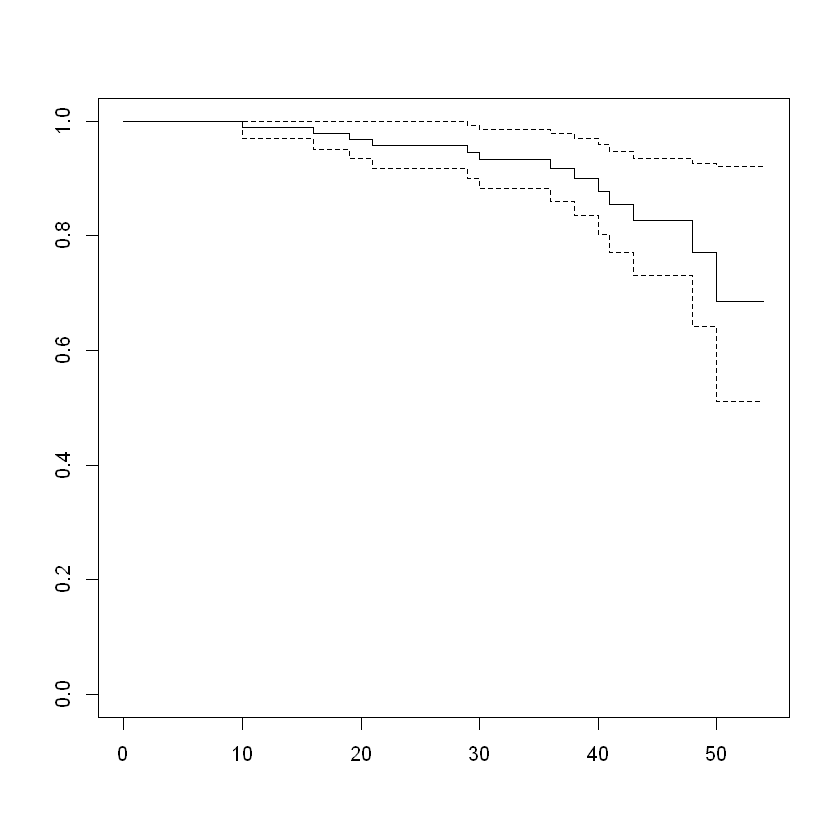

In [8]:
plot(model1)

In [9]:
model2 = survfit(czasy~dane$Nowotwor)
summary(model2)

Call: survfit(formula = czasy ~ dane$Nowotwor)

11 observations deleted due to missingness 
                dane$Nowotwor=1 
     time n.risk n.event survival std.err lower 95% CI upper 95% CI

                dane$Nowotwor=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   19     53       1    0.981  0.0187        0.945            1
   29     46       1    0.960  0.0279        0.907            1
   30     43       1    0.937  0.0351        0.871            1
   48      9       1    0.833  0.1030        0.654            1

                dane$Nowotwor=3 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   10     26       1    0.962  0.0377       0.8904        1.000
   16     25       1    0.923  0.0523       0.8261        1.000
   21     23       1    0.883  0.0636       0.7668        1.000
   36     18       1    0.834  0.0767       0.6964        0.999
   38     15       1    0.778  0.0895       0.6213        0.975
   40      9       1    0.692  0.11

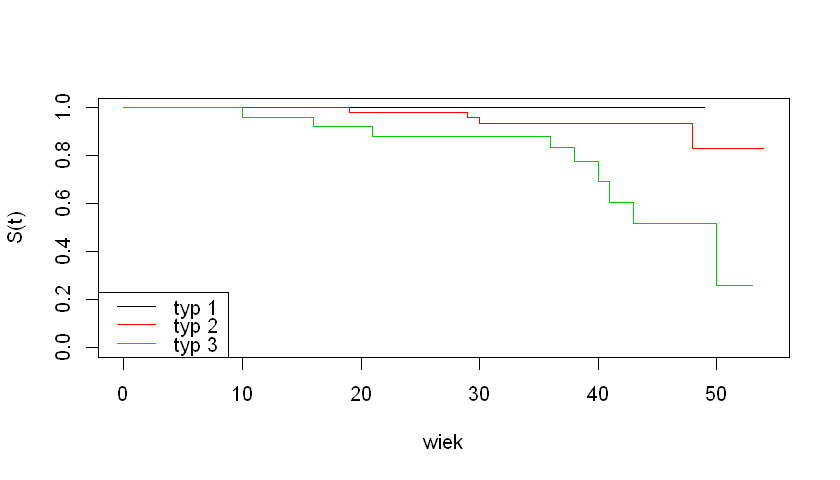

In [10]:
options(repr.plot.width=7, repr.plot.height=4)
plot(model2, col=1:3, xlab="wiek", ylab="S(t)")
legend("bottomleft", legend=c("typ 1","typ 2","typ 3"), col=1:3, lty=1, y.intersp=1.7)

In [11]:
survdiff(czasy~dane$Nowotwor) #test, wskazuje czy krzywa przezycia rozni sie istotnie dla roznych stopni zaawansowania nowotworu

Call:
survdiff(formula = czasy ~ dane$Nowotwor)

n=86, 11 observations deleted due to missingness.

                 N Observed Expected (O-E)^2/E (O-E)^2/V
dane$Nowotwor=1  7        0    0.913     0.913     0.991
dane$Nowotwor=2 53        4    8.532     2.408     7.091
dane$Nowotwor=3 26        9    3.554     8.344    11.552

 Chisq= 11.7  on 2 degrees of freedom, p= 0.003 

<h4> <center> Model Coxa (Model hazardu proporcjonalnego) </center> 

$h(t) = P(T=t|T \geq t)$

$h(t,X) = h_0(t)e^{X\beta} $

Zauważ, że z postaci modelu wynika, że $\frac{h(t,X_1)}{h(t,X_2)} = \frac{h_0(t)e^{X_1\beta}}{h_0(t)e^{X_2\beta}}=e^{(X_1-X_2)\beta}$ (czyli nie zależy od czasu!)

Załóżmy, że $X = (x_1,x_2,...,x_n)$ (wektor $X$ składa się z $n$ cech). Niech cecha $x_1$ wzrośnie o 1. Jak wtedy zmieni się funkcja hazardu?

$\frac{h(t,(x_1+1,x_2,...,x_n))}{h(t,(x_1,x_2,...,x_n))} = e^{(x_1+1)\beta_1+x_2 \beta_2 +... - x_1 \beta_1 - x_2 \beta_2 ...} = e^{\beta_1}$

Analogicznie dla pozostałych zmiennych. Wartość tę nazywamy hazardem względnym (HR = hazard ratio).

Uwaga: Zachodzi następująca relacja pomiędzy funkcją hazardu a funkcją przeżycia $h(t) = -\frac{d}{dt}\ln S(t)$

In [12]:
model = coxph(czasy~Nowotwor+Wiek, data = dane) #concordance opisuje jakosc modelu, 1 - idealnie, 0.6-0.7 ok, 0.5 - losowy
summary(model)

Call:
coxph(formula = czasy ~ Nowotwor + Wiek, data = dane)

  n= 86, number of events= 13 
   (11 observations deleted due to missingness)

             coef exp(coef) se(coef)      z Pr(>|z|)   
Nowotwor  1.75372   5.77607  0.59566  2.944  0.00324 **
Wiek     -0.05632   0.94524  0.04340 -1.297  0.19447   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

         exp(coef) exp(-coef) lower .95 upper .95
Nowotwor    5.7761     0.1731    1.7973    18.563
Wiek        0.9452     1.0579    0.8682     1.029

Concordance= 0.747  (se = 0.073 )
Likelihood ratio test= 12.17  on 2 df,   p=0.002
Wald test            = 10  on 2 df,   p=0.007
Score (logrank) test = 11.62  on 2 df,   p=0.003


<h4> Zadanie3: Odczytaj hazardy względne dla zmiennych Nowotwor oraz Wiek. Zinterpretuj ich wartości.

<h4> Zadanie4: Zauważ, że w powyższym modelu nie jest estymowany wyraz wolny. Dlaczego możemy z niego zrezygnować?

In [13]:
print(anova(model))

Analysis of Deviance Table
 Cox model: response is czasy
Terms added sequentially (first to last)

          loglik   Chisq Df Pr(>|Chi|)   
NULL     -49.414                         
Nowotwor -44.129 10.5700  1   0.001149 **
Wiek     -43.331  1.5956  1   0.206534   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


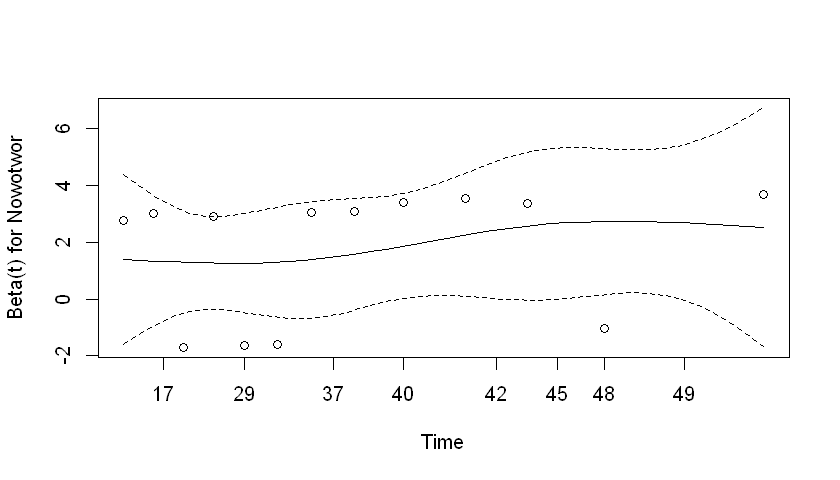

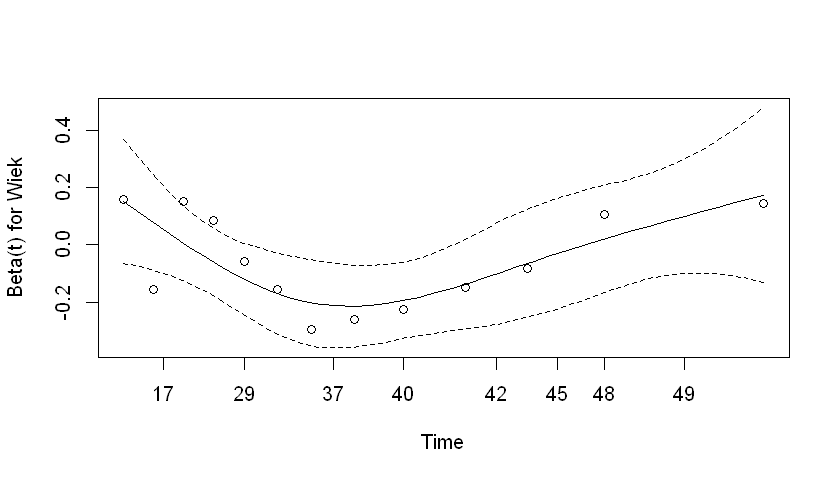

In [14]:
plot(cox.zph(model)) #wizualna ocena założeń: nachylenie powinno byc bliskie zera

Ciekawostka:
W Europie Zachodniej $S(100) > S(110)$ (oczywiste), ale $h(100) \approx h(110)$. Czyli z jednej strony oczywiście prawdopodobieństwo przeżycia 100 lat jest większe niż 110 lat, ale już ryzyko śmierci dla osób w wieku 100 i 110 jest porównywalne.

Warto poczytać: https://socialsciences.mcmaster.ca/jfox/Books/Companion-1E/appendix-cox-regression.pdf